## Maszyna wektorów nośnych

### Wygenerowanych "sztucznych", zaszumionych danych

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generowanie danych: dwie "zaszumione" klasy 
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tworzenie modelu SVM z liniowym jądrem
c = 1
model = SVC(kernel='linear', C=c)
model.fit(X_train, y_train)

# Ocena modelu
accuracy = model.score(X_test, y_test)
print(f'Dokładność: {accuracy:.2f}')



Dokładność: 0.97


### Wizualizacja modelu

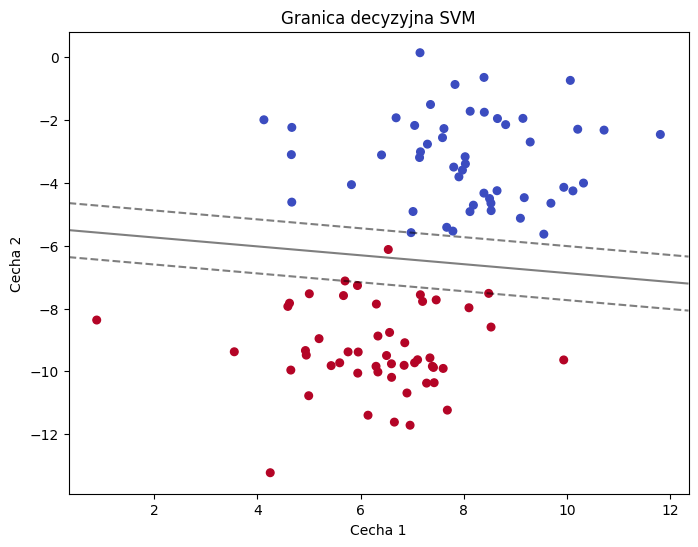

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=30)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Siatka
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Granica + marginesy
ax.contour(XX, YY, Z, colors='k', levels=[-c, 0, c],
            alpha=0.5, linestyles=['--', '-', '--'])
plt.title("Granica decyzyjna SVM")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.show()